In [3]:
import tensorflow as tf
import numpy as np

np.set_printoptions(precision=2)


import matplotlib.pyplot as plt
%matplotlib inline

### Tutorial VDO
* https://www.youtube.com/watch?v=vRF7ENlwD50&feature=youtu.be

In [4]:
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    
    z = 2*(a - b) + c

    
with tf.Session(graph=g) as sess:
    print(sess.run(z))
    print(z.eval())

1
1


### Placeholders

In [11]:
g =  tf.Graph()

with g.as_default():
    tf_a = tf.placeholder(dtype=tf.int32, shape=[], name='tf_a')
    tf_b = tf.placeholder(dtype=tf.int32, shape=[], name='tf_b')
    tf_c = tf.placeholder(dtype=tf.int32, shape=[], name='tf_c')
    
    r1 = tf_a - tf_b
    r2 = 2 * r1
    z = r2 + tf_c
    
with tf.Session(graph=g) as sess:
    feed = {tf_a: 1, tf_b:2, tf_c:3}
    print('z:', sess.run(z, feed_dict=feed))

z: 1


### placeholders for data arrays with varying bathsizes

In [16]:
g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=[None, 2], name='tf_x')
    
    # column means
    x_mean = tf.reduce_mean(tf_x, axis=0, name='x_mean')
    

with tf.Session(graph=g) as sess:
    np.random.seed(123)
    x1 = np.random.uniform(low=0, high=1, size=(5, 2))
    x2 = np.random.uniform(low=0, high=1, size=(10, 2))
    
    print("Feeding data with shape {}".format(x1.shape))
    print('Result: {}'.format(sess.run(x_mean, feed_dict={tf_x: x1})))
    print('-'*30)
    print("Feeding data with shape {}".format(x2.shape))
    print('Result: {}'.format(sess.run(x_mean, feed_dict={tf_x: x2})))

Feeding data with shape (5, 2)
Result: [ 0.62  0.47]
------------------------------
Feeding data with shape (10, 2)
Result: [ 0.46  0.49]


In [19]:
tf_x.get_shape().as_list()

[None, 2]

### Variables

In [26]:
tf.get_variable('abc', shape=[])

<tf.Variable 'abc:0' shape=() dtype=float32_ref>

In [21]:
tf.zeros_initializer

In [22]:
tf.GraphKeys.TRAINABLE_VARIABLES

'trainable_variables'

In [33]:
g = tf.Graph()

with g.as_default():
    w = tf.Variable(np.arange(1, 9, dtype=np.int32).reshape(2,-1), name='w')
    print(w)
    
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    print(w.eval())

<tf.Variable 'w:0' shape=(2, 4) dtype=int32_ref>
[[1 2 3 4]
 [5 6 7 8]]


In [41]:
g = tf.Graph()

with g.as_default():
    
    with tf.variable_scope('net_A'):
        with tf.variable_scope('layer-1'):
            w1 = tf.get_variable('weights', shape=(10, 4), dtype=tf.float32, 
                                 initializer=tf.random_normal_initializer(seed=0))
        with tf.variable_scope('layer-2'):
            w2 = tf.get_variable('weights', shape=(20, 10), dtype=tf.float32, 
                                 initializer=tf.random_normal_initializer(seed=1))
    
    with tf.variable_scope('net_B'):
        with tf.variable_scope('layer-1'):
            w3 = tf.get_variable('weights', shape=(10, 4), dtype=tf.float32, 
                                 initializer=tf.random_normal_initializer(seed=0))
            
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(w1))
    print(sess.run(w3))

[[-0.4   2.1   0.17  0.55]
 [-2.42  0.42  0.29 -0.5 ]
 [-0.96 -0.65  0.11 -0.1 ]
 [-1.3  -0.5   0.02 -0.09]
 [-0.13 -0.04 -0.46  0.55]
 [-0.39  2.52 -1.46  0.9 ]
 [-0.26  0.62 -0.25  0.76]
 [-0.89  1.32 -1.2   0.76]
 [ 0.84  0.25  0.24 -1.9 ]
 [-1.43 -0.53  0.26 -0.94]]
[[-0.4   2.1   0.17  0.55]
 [-2.42  0.42  0.29 -0.5 ]
 [-0.96 -0.65  0.11 -0.1 ]
 [-1.3  -0.5   0.02 -0.09]
 [-0.13 -0.04 -0.46  0.55]
 [-0.39  2.52 -1.46  0.9 ]
 [-0.26  0.62 -0.25  0.76]
 [-0.89  1.32 -1.2   0.76]
 [ 0.84  0.25  0.24 -1.9 ]
 [-1.43 -0.53  0.26 -0.94]]


In [39]:
print(w1)
print(w2)
print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>


### Reusing variables

In [45]:
def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    
    weights = tf.get_variable('weights', shape=(data_shape[1], n_classes), dtype=tf.float32)
    bias = tf.get_variable('bias', shape=(n_classes), dtype=tf.float32, initializer=tf.zeros_initializer)
    
    logits = tf.add(tf.matmul(data, weights), bias, name='logits')
    return logits, tf.nn.softmax(logits)
    

def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    
    # layer 1
    w1 = tf.get_variable('w1', shape=(data_shape[1], n_hidden), dtype=tf.float32)
    b1 = tf.get_variable('b1', shape=(n_hidden), dtype=tf.float32, 
                         initializer=tf.zeros_initializer)
    
    z1 = tf.add(tf.matmul(data, w1), b1, name='z1')
    a1 = tf.nn.relu(z1, name='a1')
    
    # layer 2
    w2 = tf.get_variable('w2', shape=(n_hidden, data_shape[1]), dtype=tf.float32)
    b2 = tf.get_variable('b2', shape=(data_shape[1]), dtype=tf.float32, 
                         initializer=tf.zeros_initializer)
    z2 = tf.add(tf.matmul(a1, w2), b2, name='output')
    return z2, tf.nn.sigmoid(z2)


In [59]:
# build graph

batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(dtype=tf.float32, shape=(batch_size, 100), name='tf_X')
    
    # build generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(tf_X, n_hidden=50)
        
    # build classifier
    with tf.variable_scope('classifier') as scope:
        # classifier with the original data
        cls_out1 = build_classifier(tf_X, tf.ones(shape=64), n_classes=2)
        
        # reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(gen_out1[1], tf.zeros(shape=batch_size), n_classes=2)


# run graph
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    x = np.random.normal(size=(batch_size, 100))
    print(sess.run(cls_out1, feed_dict={tf_X:x}))

(array([[ 0.78, -1.49],
       [ 0.72,  1.5 ],
       [-1.96, -2.43],
       [ 1.46, -2.65],
       [ 1.02,  3.11],
       [-1.04, -1.58],
       [-1.31, -2.68],
       [ 1.87,  0.14],
       [ 2.02,  2.01],
       [-0.36, -2.44],
       [ 1.72,  2.58],
       [ 2.51, -2.96],
       [-0.6 , -0.97],
       [ 0.64,  0.05],
       [ 0.26,  2.31],
       [-0.29,  0.4 ],
       [-3.22, -1.45],
       [-1.58, -0.68],
       [ 1.08, -1.95],
       [ 1.27, -1.31],
       [-0.95, -0.6 ],
       [-2.01, -1.39],
       [-2.48, -0.35],
       [-0.47, -1.19],
       [ 0.88,  0.4 ],
       [-1.22, -2.25],
       [-1.83,  2.44],
       [ 0.67, -0.72],
       [ 0.43, -0.58],
       [ 0.56, -1.28],
       [ 0.32, -0.51],
       [-0.84,  0.78],
       [ 0.86,  1.12],
       [-1.72,  1.33],
       [-1.84,  3.48],
       [ 0.45, -1.3 ],
       [ 0.4 ,  1.17],
       [-0.83,  1.17],
       [-1.35,  0.59],
       [-2.13,  0.15],
       [ 2.02,  0.19],
       [ 0.5 ,  1.08],
       [-2.45, -2.39],
       [-0

### Building a regression model

* input x: tf_x defined as a placeholder
* input y: tf_y defined as a placeholder
* parameter w: weight defined as a variable
* parameter b: bias defined as a variable
* model output $\hat{y}$: y_hat as predicted values

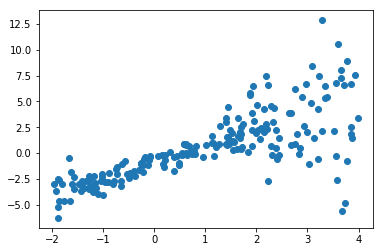

In [5]:
# create a random top dataset for regression
def make_data():
    # size 200, [-2, 4]
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0, scale=(0.5 + t*t/3), size=None)
        y.append(r)
    y = np.asarray(y)
    return x, 1.726*x - 0.84 + y

np.random.seed(0)
x, y = make_data()

plt.plot(x, y, 'o')

In [16]:
# create graph
g = tf.Graph()

with g.as_default():
    
    # define input/labels
    tf_x = tf.placeholder(dtype=tf.float32, shape=(None), name='tf_x')   # 1-d with any length
    tf_y = tf.placeholder(dtype=tf.float32, shape=(None), name='tf_y')
    
    # define parameters
    w = tf.Variable(tf.random_normal(shape=(1,1)), name='weight')
    b = tf.Variable(tf.zeros(shape=1), name='bias')
    
    # operations
    y_hat = tf.add(tf_x * w, b, name='y_hat')
    
    error = y_hat - tf_y
    cost = tf.reduce_mean(tf.square(error), name='cost')
    
    # optimizer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=.001)
    train_op = optimizer.minimize(cost, name='train_op')

In [17]:
# train/test split
x_train, x_test = x[:100], x[100:]
y_train, y_test = y[:100], y[100:]

n_epochs = 500
training_costs = []

with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(n_epochs):
        _, c = sess.run([train_op, cost], feed_dict={tf_x:x_train, tf_y:y_train})
        
        training_costs.append(c)
        
        if (i+1)%50 == 0:
            print('Epoch {}: cost: {:.4f}'.format(i+1, c))
            
    y_pred = sess.run(y_hat, feed_dict={tf_x:x_test})

Epoch 50: cost: 12.4805
Epoch 100: cost: 8.5652
Epoch 150: cost: 6.7049
Epoch 200: cost: 5.7895
Epoch 250: cost: 5.3131
Epoch 300: cost: 5.0447
Epoch 350: cost: 4.8781
Epoch 400: cost: 4.7640
Epoch 450: cost: 4.6792
Epoch 500: cost: 4.6124


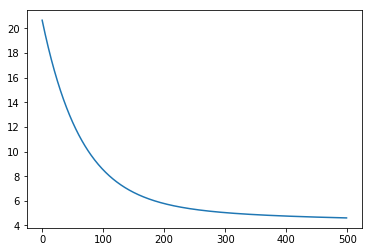

In [18]:
plt.plot(training_costs)

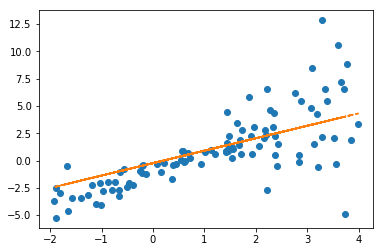

In [19]:
plt.plot(x_test, y_test, 'o')
plt.plot(x_test, y_pred.ravel(), '--')

### Executing objects in a TensorFlow graph using their names

In [20]:
training_costs = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(n_epochs):
        c, _ = sess.run(['cost:0', 'train_op'], 
                        feed_dict={tf_x:x_train, tf_y:y_train})
        training_costs.append(c)

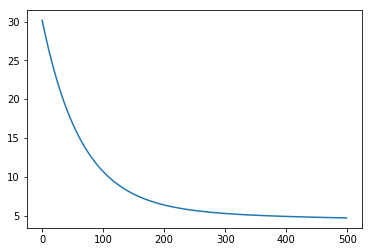

In [21]:
plt.plot(training_costs)

### Saving and restoring a model in TensorFlow

In [22]:
with g.as_default():
    # add saver to the graph g
    saver = tf.train.Saver()

In [23]:
n_epoch = 500
training_costs = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(n_epoch):
        _, c = sess.run(['train_op', 'cost:0'], feed_dict={tf_x:x_train, tf_y:y_train})
        training_costs.append(c)
        
        if (i+1) % 50 == 0:
            print('Epoch {}: cost {:.4f}'.format(i+1, c))
            
    saver.save(sess, './trained-model')

Epoch 50: cost 17.1934
Epoch 100: cost 10.8350
Epoch 150: cost 7.8468
Epoch 200: cost 6.4035
Epoch 250: cost 5.6739
Epoch 300: cost 5.2789
Epoch 350: cost 5.0448
Epoch 400: cost 4.8916
Epoch 450: cost 4.7817
Epoch 500: cost 4.6972


In [24]:
g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph('./trained-model.meta')
    
    new_saver.restore(sess, './trained-model')
    
    y_pred = sess.run('y_hat:0', feed_dict={'tf_x:0': x_test})

INFO:tensorflow:Restoring parameters from ./trained-model


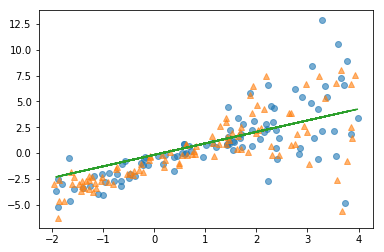

In [29]:
plt.plot(x_test, y_test, 'o', alpha=.6)
plt.plot(x_train, y_train, '^', alpha=.6)
plt.plot(x_test, y_pred.ravel(), '--')

### Transforming Tensors as multidimensional data arrays

In [34]:
g = tf.Graph()

with g.as_default():
    arr = np.arange(1, 17).reshape(4, 4)
    T1 = tf.constant(arr, name='T1')
    print(T1)
    
    s = T1.get_shape().as_list()
    T2 = tf.Variable(tf.random_normal(shape=s))
    print(T2)
    
    T3 = tf.Variable(tf.random_normal(shape=(s[0],)))
    print(T3)

Tensor("T1:0", shape=(4, 4), dtype=int32)
<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(4,) dtype=float32_ref>


In [36]:
with g.as_default():
    T4 = tf.reshape(T1, shape=(1, 1, -1), name='T4')
    print(T4)
    
    T5 = tf.reshape(T1, shape=(1, 2, -1), name='T5')
    print(T5)

Tensor("T4:0", shape=(1, 1, 16), dtype=int32)
Tensor("T5:0", shape=(1, 2, 8), dtype=int32)


In [37]:
with tf.Session(graph=g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]]]

[[[ 1  2  3  4  5  6  7  8]
  [ 9 10 11 12 13 14 15 16]]]


In [38]:
with g.as_default():
    T6 = tf.transpose(T5, perm=[2, 1, 0], name='T6')
    print(T6)
    T7 = tf.transpose(T5, perm=[0, 2, 1], name='T7')
    print(T7)

Tensor("T6:0", shape=(8, 2, 1), dtype=int32)
Tensor("T7:0", shape=(1, 8, 2), dtype=int32)


In [39]:
with g.as_default():
    t5_split = tf.split(T5, num_or_size_splits=2, axis=2, name='T8')
    print(t5_split)

[<tf.Tensor 'T8:0' shape=(1, 2, 4) dtype=int32>, <tf.Tensor 'T8:1' shape=(1, 2, 4) dtype=int32>]


In [41]:
with g.as_default():
    T9 = tf.concat(t5_split, axis=2, name='T9')
    print(T9)
    
    T10 = tf.concat(t5_split, axis=0, name='T10')
    print(T10)
    
    T11 = tf.concat(t5_split, axis=1, name='T11')
    print(T11)

Tensor("T9_1:0", shape=(1, 2, 8), dtype=int32)
Tensor("T10:0", shape=(2, 2, 4), dtype=int32)
Tensor("T11:0", shape=(1, 4, 4), dtype=int32)


### Utilizing control flow mechanics in building graphs

In [50]:
g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=None, name='tf_x')
    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name='tf_y')
    
    result = tf.cond(tf_x < tf_y, 
                     true_fn=lambda: tf.add(tf_x, tf_y, name='result_add'), 
                     false_fn=lambda: tf.subtract(tf_x, tf_y, name='result_sub'))
    print(result)

Tensor("cond/Merge:0", dtype=float32)


In [51]:
with tf.Session(graph=g) as sess:
    file_writer = tf.summary.FileWriter(logdir='./logs', graph=g)

In [44]:
with tf.Session(graph=g) as sess:
    
    x, y = 2, 1
    print('x < y:', x < y, '-> Result:', sess.run(result, feed_dict={tf_x:x, tf_y:y}))
    
    x, y, = 1, 2
    print('x < y:', x < y, '-> Result:', sess.run(result, feed_dict={tf_x:x, tf_y:y}))

x < y: False -> Result: 1.0
x < y: True -> Result: 3.0


### Visualizing the graph with TensorBoard

In [48]:
batch_size = 64

g = tf.Graph()
with g.as_default():
    tf_X = tf.placeholder(dtype=tf.float32, shape=(batch_size, 100), name='tf_X')
    
    # build the generator
    with tf.variable_scope('generator'):
        gen_out1 = build_generator(tf_X, n_hidden=50)
    
    # build classifier
    with tf.variable_scope('classifier') as scope:
        cls_out1 = build_classifier(tf_X, 
                                    tf.ones(shape=(batch_size)))
        
        scope.reuse_variables()
        cls_out2 = build_classifier(gen_out1[1], 
                                    tf.zeros(shape=(batch_size)))

In [49]:
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())
    
    file_writer = tf.summary.FileWriter(logdir='./logs/', graph=g)